## MediaPipe Object Detection

In [1]:
!pip install tflite_support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 KB 26.4 MB/s eta 0:00:00


In [2]:
import cv2
import matplotlib.pyplot as plt
from tflite_support.task import vision
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["image.cmap"] = "gray"

In [66]:
def visualize(img_file_name, detector, conf_thresh = 0.1, thickness=3, FONT_SCALE=2, FONT_THICKNESS=1):
  img = cv2.imread(img_file_name)
  h, w , _ = img.shape
  FONT_SCALE = int(h*w/4000000)
  if FONT_SCALE < 1:
    FONT_SCALE = 1

  canvas = img.copy()
  tensor_image = vision.TensorImage.create_from_file(img_file_name)
  results = detector.detect(tensor_image)
  for detection in results.detections:
    x1 = detection.bounding_box.origin_x 
    y1 = detection.bounding_box.origin_y 
    width = detection.bounding_box.width 
    height = detection.bounding_box.height
    x2 = x1 + width
    y2 = y1 + height
    score = detection.categories[0].score 
    score = round(score, 2)
    category = detection.categories[0].category_name
    label = str(category) + ": " + str(score)

    if score > conf_thresh:
      print(f"\t {category} \t {score} \t bbox: ({x1}, {y1}), ({x2},{y2})")
      cv2.rectangle(canvas, (x1, y1), (x2, y2), (0,0,255), thickness)
      (label_w, label_h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX, FONT_SCALE, FONT_THICKNESS)
      cv2.rectangle(canvas, (x1, int(y1-1.7*label_h)), (int(x1 + 1.2*label_w), y1), (255,255,255), -1)
      cv2.putText(canvas, label, (int(x1 + 0.02*x1), int(y1 - 0.2*label_h)), cv2.FONT_HERSHEY_COMPLEX, FONT_SCALE, (255,0,0), FONT_THICKNESS)

  return canvas

### Download Models and Images

In [ ]:
!wget https://www.dropbox.com/s/xm0t0g972wi5vu3/lite-model_efficientdet_lite2_detection_metadata_1.tflite?dl=1 -O lite-model_efficientdet_lite2_detection_metadata_1.tflite

In [ ]:
!wget "https://www.dropbox.com/scl/fo/qz9c3ycfn5pudgax4u6m7/h?dl=1&rlkey=tr9hrw2nfjhen2diihc4ewgps" -O media.zip -q
!unzip -qq media.zip -d media

In [6]:
detector = vision.ObjectDetector.create_from_file('lite-model_efficientdet_lite2_detection_metadata_1.tflite')

	 dog 	 0.68 	 bbox: (17, 2160), (3946,5786)


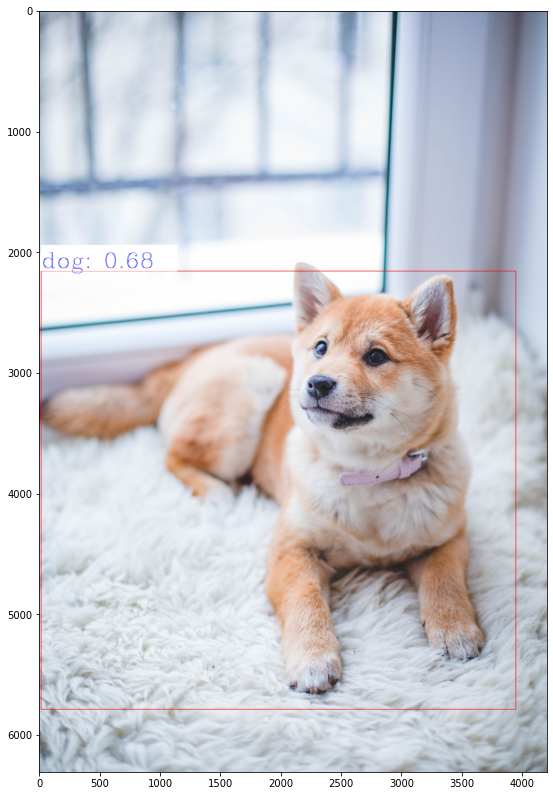

In [67]:
res1 = visualize('./media/dog.jpg', detector, conf_thresh = 0.1, thickness=4, FONT_SCALE=5, FONT_THICKNESS=2)
plt.figure(figsize=(20,14))
plt.imshow(res1[...,::-1]);

In [68]:
res2 = visualize('./media/miao.jpg', detector)
plt.figure(figsize=(20,14))
plt.imshow(res2[...,::-1]);

Output hidden; open in https://colab.research.google.com to view.